In [1]:
import pandas as pd
import numpy as np
import random

# Create a list of unique SKUs
sku_list = ["SKU001", "SKU002", "SKU003", "SKU004", "SKU005"]

# Create a list of dates for the entire year
dates = pd.date_range(start='2023-01-01', periods=365, freq='D')

# Generate random sales data for each SKU
data = {
    'Date': [random.choice(dates) for _ in range(365 * len(sku_list))],
    'SKU': [random.choice(sku_list) for _ in range(365 * len(sku_list))],
    'Sales': [random.randint(1000, 10000) for _ in range(365 * len(sku_list))],
    'Price': [round(random.uniform(5, 50), 2) for _ in range(365 * len(sku_list))],
    'Inventory': [random.randint(100, 1000) for _ in range(365 * len(sku_list))],
    'Category': [random.choice(['Dry Food', 'Wet Food', 'Collars', 'Toys', 'Costumes']) for _ in range(365 * len(sku_list))]
}

# Create a DataFrame
sales_data = pd.DataFrame(data)

# Display the first few rows of the sales data with attributes
print(sales_data.tail())


           Date     SKU  Sales  Price  Inventory  Category
1820 2023-10-29  SKU001   1532  11.73        730  Costumes
1821 2023-05-28  SKU004   2206  10.74        785      Toys
1822 2023-03-09  SKU005   6504   9.49        285   Collars
1823 2023-02-10  SKU003   3078  29.38        719   Collars
1824 2023-02-24  SKU001   7225  22.83        562  Dry Food


In [2]:
# LSTM
# For LSTM-based anomaly detection, you would typically need a time series dataset with sequences. 
# Here's a basic example of using LSTM for sequence-based anomaly detection:
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np

# Create sequences of sales data
seq_length = 10
sequences = [np.array(sales_data['Sales'][i:i+seq_length]) for i in range(len(sales_data) - seq_length + 1)]

# Reshape data for LSTM
X = np.array(sequences)

# Create an LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X, X, epochs=50, batch_size=32, verbose=0)

# Calculate reconstruction errors
predictions = model.predict(X)
# Calculate reconstruction errors
reconstruction_errors = np.mean(np.square(X - predictions), axis=1)

# Define a threshold for anomaly detection
threshold = np.percentile(reconstruction_errors, 95)
anomalies_lstm = reconstruction_errors > threshold


2023-11-16 07:51:44.562798: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


57/57 [==============================] - 0s 856us/step


In [3]:
sequences

[array([1399, 5067, 3216, 4247, 1513, 5689, 5055, 3785, 3462, 5573]),
 array([5067, 3216, 4247, 1513, 5689, 5055, 3785, 3462, 5573, 3718]),
 array([3216, 4247, 1513, 5689, 5055, 3785, 3462, 5573, 3718, 9929]),
 array([4247, 1513, 5689, 5055, 3785, 3462, 5573, 3718, 9929, 3806]),
 array([1513, 5689, 5055, 3785, 3462, 5573, 3718, 9929, 3806, 5276]),
 array([5689, 5055, 3785, 3462, 5573, 3718, 9929, 3806, 5276, 7955]),
 array([5055, 3785, 3462, 5573, 3718, 9929, 3806, 5276, 7955, 1358]),
 array([3785, 3462, 5573, 3718, 9929, 3806, 5276, 7955, 1358, 1260]),
 array([3462, 5573, 3718, 9929, 3806, 5276, 7955, 1358, 1260, 4997]),
 array([5573, 3718, 9929, 3806, 5276, 7955, 1358, 1260, 4997, 9468]),
 array([3718, 9929, 3806, 5276, 7955, 1358, 1260, 4997, 9468, 4664]),
 array([9929, 3806, 5276, 7955, 1358, 1260, 4997, 9468, 4664, 2348]),
 array([3806, 5276, 7955, 1358, 1260, 4997, 9468, 4664, 2348, 6613]),
 array([5276, 7955, 1358, 1260, 4997, 9468, 4664, 2348, 6613, 7083]),
 array([7955, 1358, 

In [4]:
anomalies_lstm

array([False, False, False, ..., False, False, False])

In [5]:
sum(anomalies_lstm)

91

### More

In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

import pandas as pd
import numpy as np
import random

# Create a list of unique SKUs
sku_list = ["SKU001", "SKU002", "SKU003", "SKU004", "SKU005"]

# Create a list of dates for the entire year
dates = pd.date_range(start='2023-01-01', periods=365, freq='D')

# Generate random sales data for each SKU
data = {
    'Date': [random.choice(dates) for _ in range(365 * len(sku_list))],
    'SKU': [random.choice(sku_list) for _ in range(365 * len(sku_list))],
    'Sales': [random.randint(1000, 10000) for _ in range(365 * len(sku_list))],
    'Price': [round(random.uniform(5, 50), 2) for _ in range(365 * len(sku_list))],
    'Inventory': [random.randint(100, 1000) for _ in range(365 * len(sku_list))],
    'Category': [random.choice(['Dry Food', 'Wet Food', 'Collars', 'Toys', 'Costumes']) for _ in range(365 * len(sku_list))]
}

# Create a DataFrame
sales_data = pd.DataFrame(data)

# Display the first few rows of the sales data with attributes
print(sales_data.tail())



# Define the sequence length for LSTM
seq_length = 7

# Standardize numerical features (Price, Inventory)
scaler = StandardScaler()
sales_data['Price'] = scaler.fit_transform(sales_data['Price'].values.reshape(-1, 1))
sales_data['Inventory'] = scaler.fit_transform(sales_data['Inventory'].values.reshape(-1, 1))



sales_data

           Date     SKU  Sales  Price  Inventory  Category
1820 2023-11-17  SKU003   5758  20.32        744   Collars
1821 2023-08-23  SKU001   2144  44.83        672  Wet Food
1822 2023-07-24  SKU001   8738  40.58        878   Collars
1823 2023-12-29  SKU002   7097  27.07        497      Toys
1824 2023-10-09  SKU003   1002  49.27        228  Wet Food


,Date,SKU,Sales,Price,Inventory,Category
0,2023-12-25,SKU005,5832,-0.727640,-0.971456,Dry Food
1,2023-04-15,SKU001,1293,-1.048724,1.422987,Dry Food
2,2023-03-03,SKU001,4887,-0.366517,0.430076,Collars
3,2023-04-22,SKU002,4417,-0.983275,0.628658,Collars
4,2023-03-31,SKU005,1520,-0.423496,0.743225,Toys
...,...,...,...,...,...,...
1820,2023-11-17,SKU003,5758,-0.526674,0.735587,Collars
1821,2023-08-23,SKU001,2144,1.360559,0.460627,Wet Food
1822,2023-07-24,SKU001,8738,1.033316,1.247318,Collars
1823,2023-12-29,SKU002,7097,-0.006934,-0.207679,Toys


The shape of anomalies_lstm being (1819, 3) suggests that your LSTM model is generating a binary anomaly mask for each input sequence. Let's break down the dimensions:

The first dimension (1819) corresponds to the number of input sequences or time steps in your dataset.
The second dimension (3) suggests that, for each time step, the model is providing a binary anomaly prediction for each of the three features (Sales, Price, Inventory).
This indicates that, for each time step in your dataset, the LSTM model is making an anomaly prediction for each of the three features independently. The True values in this matrix indicate that an anomaly is detected for the corresponding feature at that time step.

If you are interested in detecting anomalies based on any of the features (i.e., if anomaly in any feature is considered an anomaly for the entire sequence), you might want to collapse the second dimension by taking the logical OR across features for each time step. You can achieve this using something like:

```
anomalies_lstm_combined = np.any(anomalies_lstm, axis=1)
```

Now, anomalies_lstm_combined would be a binary array of shape (1819,), where each element indicates whether an anomaly is detected in any of the features for the corresponding time step.


**How does the first dimension change over my choice of seq_length?**
The first dimension of anomalies_lstm is determined by the number of sequences or time steps in your dataset. Specifically, it's influenced by the total number of sequences that can be created given your dataset length and the chosen sequence length (seq_length).

The formula for calculating the number of sequences is:

Number of Sequences=Total Data Points−Sequence Length+1

So, if you have a longer sequence length, you will have fewer sequences, and if you have a shorter sequence length, you will have more sequences.

Let's take an example:

If you originally had a seq_length of 10 and the total data points were 1825, then you'd get 
1825−10+1=1826 sequences.

If you change seq_length to 7, you'd get 1825−7+1=1819 sequences.

So, by changing seq_length, you are effectively changing the number of sequences or time steps that your LSTM processes, and consequently, the first dimension of anomalies_lstm changes accordingly.


In [22]:
# Create sequences of data
sequences = [sales_data[['Sales', 'Price', 'Inventory']].iloc[i:i+seq_length].values for i in range(len(sales_data) - seq_length + 1)]

# Reshape data for LSTM
X = np.array(sequences)

from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np

# Create an LSTM model with matching input and output shapes
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length, 3), return_sequences=True))  # Updated input shape to accommodate 3 features and return sequences
model.add(Dense(3))  # Updated output shape to match input shape
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X, X, epochs=50, batch_size=32, verbose=0)

# Calculate reconstruction errors
predictions = model.predict(X)
# Calculate reconstruction errors
reconstruction_errors = np.mean(np.square(X - predictions), axis=1)

# Define a threshold for anomaly detection
threshold = np.percentile(reconstruction_errors, 95)
anomalies_lstm = reconstruction_errors > threshold

# Display anomalies
anomalies_df = sales_data.iloc[seq_length - 1:][anomalies_lstm]
print(anomalies_df)


57/57 [==============================] - 0s 747us/step
           Date     SKU  Sales     Price  Inventory  Category
16   2023-06-25  SKU002   9852 -1.459896   0.781414      Toys
17   2023-01-25  SKU002   5936 -0.265649   0.964721      Toys
26   2023-09-29  SKU005   6018  1.501467   0.582832  Wet Food
29   2023-07-03  SKU001   3973  1.402909   1.678853      Toys
34   2023-02-23  SKU002   8052 -1.281259  -0.536103  Wet Food
...         ...     ...    ...       ...        ...       ...
1798 2023-11-19  SKU001   3425 -1.389057  -0.688859      Toys
1812 2023-01-20  SKU005   4051 -1.590793  -0.960000  Wet Food
1816 2023-09-28  SKU003   1544 -1.028704  -0.730866      Toys
1818 2023-08-11  SKU001   8503 -1.114943   0.139840   Collars
1824 2023-10-09  SKU003   1002  1.702433  -1.234960  Wet Food

[273 rows x 6 columns]


The output you provided seems to be a DataFrame containing records for which the LSTM model detected anomalies. Let's break down what each column represents:

Date: The date of the sales record.

SKU: The Stock Keeping Unit, which identifies the product associated with the sales record.

Sales: The sales quantity for the specific SKU on the given date. These are the sales values where the anomalies were detected.

Price: The standardized price of the SKU for the corresponding date. It appears that the values have been scaled, and higher values may indicate a higher price compared to the SKU's historical data.

Inventory: The standardized inventory level of the SKU for the corresponding date. Similarly, the values have been scaled, and higher values may indicate higher inventory levels relative to historical data.

Category: The category of the SKU, which classifies the product into a particular group.

In the context of anomaly detection, these records are flagged as anomalies because they exhibit unusual behavior compared to the historical data for the specific SKU. The anomalies could be due to various factors such as unusually high or low sales, pricing changes, or inventory fluctuations compared to the SKU's historical patterns.

Analyzing these anomalies can help you identify specific products or categories that require further investigation or action. For example, you may want to examine why there was a significant spike or drop in sales for certain SKUs or whether there are any specific patterns in the anomalies related to SKU category.

These anomalies could potentially indicate areas where you should focus your attention to optimize sales and inventory management.

### More analysis

1. Visualize anomalies over time:

- plot the sales data over time
- highlight the time points where anomalies were detected

In [23]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Sort the sales_data DataFrame by SKU and Date
# sales_data_sorted = sales_data.sort_values(by=['SKU', 'Date']).copy()

# # Create sequences of data for the entire DataFrame
# sequences_all = [sales_data_sorted[['Sales', 'Price', 'Inventory']].iloc[i:i+seq_length].values for i in range(len(sales_data_sorted) - seq_length + 1)]
# X_all = np.array(sequences_all)

# # Predict using the LSTM model
# predictions_all = model.predict(X_all)
# # Calculate reconstruction errors for the entire DataFrame
# reconstruction_errors_all = np.mean(np.square(X_all - predictions_all), axis=(1, 2))

# # Define a threshold for anomaly detection for the entire DataFrame
# threshold_all = np.percentile(reconstruction_errors_all, 95)
# anomalies_all = reconstruction_errors_all > threshold_all

# # Set anomalies to the 'Anomaly' column
# sales_data_sorted['Anomaly'] = False
# sales_data_sorted.loc[sales_data_sorted.index[seq_length - 1:], 'Anomaly'] = anomalies_all

# # Visualize sales data over time with anomalies
# plt.figure(figsize=(12, 6))
# sns.lineplot(x='Date', y='Sales', data=sales_data_sorted, hue='SKU', ci=None)
# sns.scatterplot(x='Date', y='Sales', data=sales_data_sorted[sales_data_sorted['Anomaly']], color='red', label='Anomalies', legend=False)
# plt.title('Sales Over Time with Anomalies')
# plt.xlabel('Date')
# plt.ylabel('Sales')
# plt.show()


57/57 [==============================] - 0s 713us/step


/var/folders/73/vngnlj612kb44dvxhx4fx0fm0000gq/T/ipykernel_31712/3307429856.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Date', y='Sales', data=sales_data_sorted[sales_data_sorted['SKU'] == sku], ci=None)


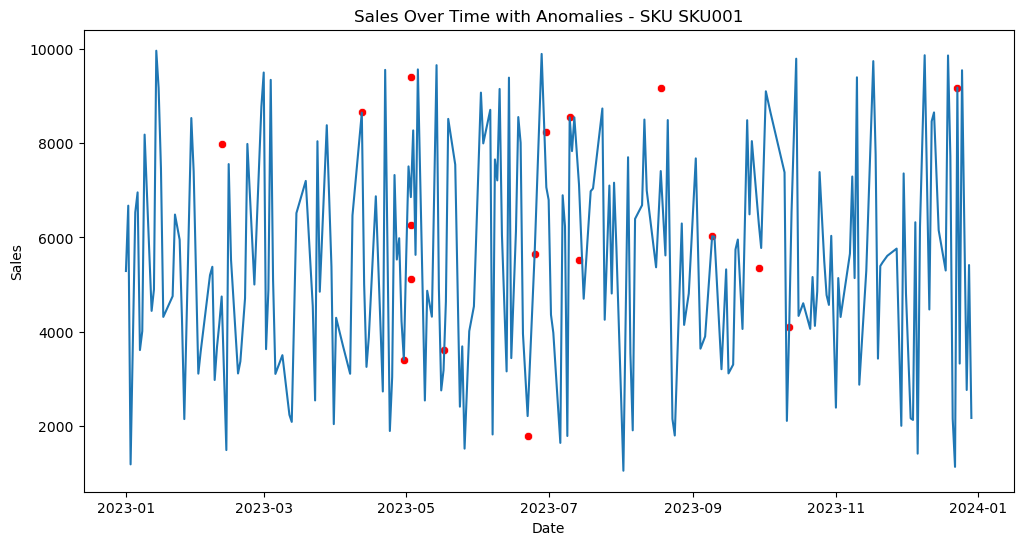

/var/folders/73/vngnlj612kb44dvxhx4fx0fm0000gq/T/ipykernel_31712/3307429856.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Date', y='Sales', data=sales_data_sorted[sales_data_sorted['SKU'] == sku], ci=None)


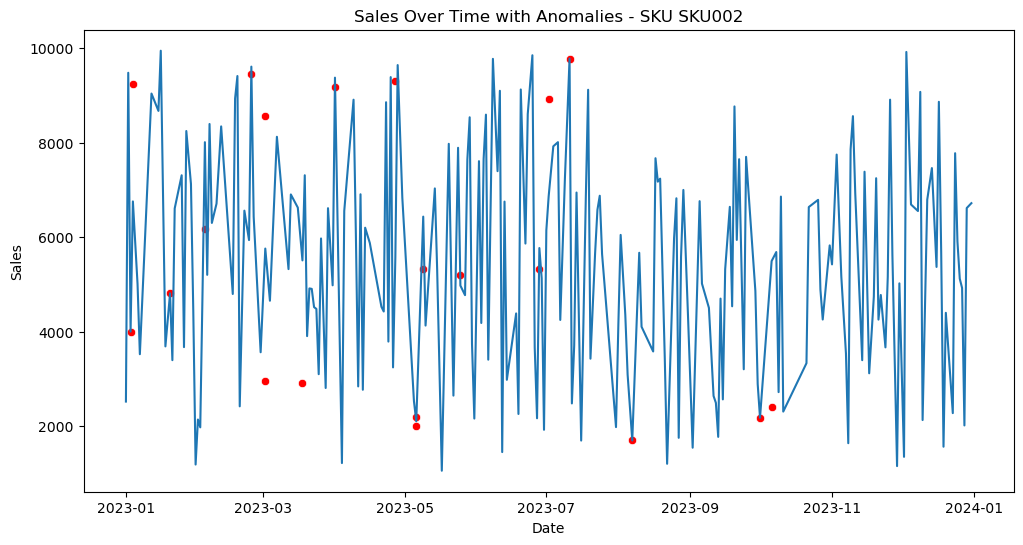

/var/folders/73/vngnlj612kb44dvxhx4fx0fm0000gq/T/ipykernel_31712/3307429856.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Date', y='Sales', data=sales_data_sorted[sales_data_sorted['SKU'] == sku], ci=None)


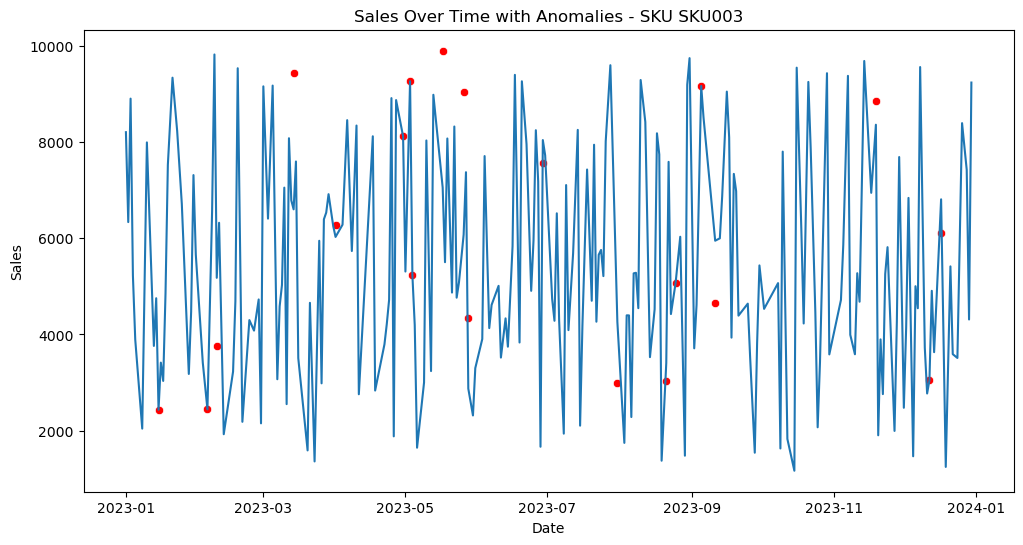

/var/folders/73/vngnlj612kb44dvxhx4fx0fm0000gq/T/ipykernel_31712/3307429856.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Date', y='Sales', data=sales_data_sorted[sales_data_sorted['SKU'] == sku], ci=None)


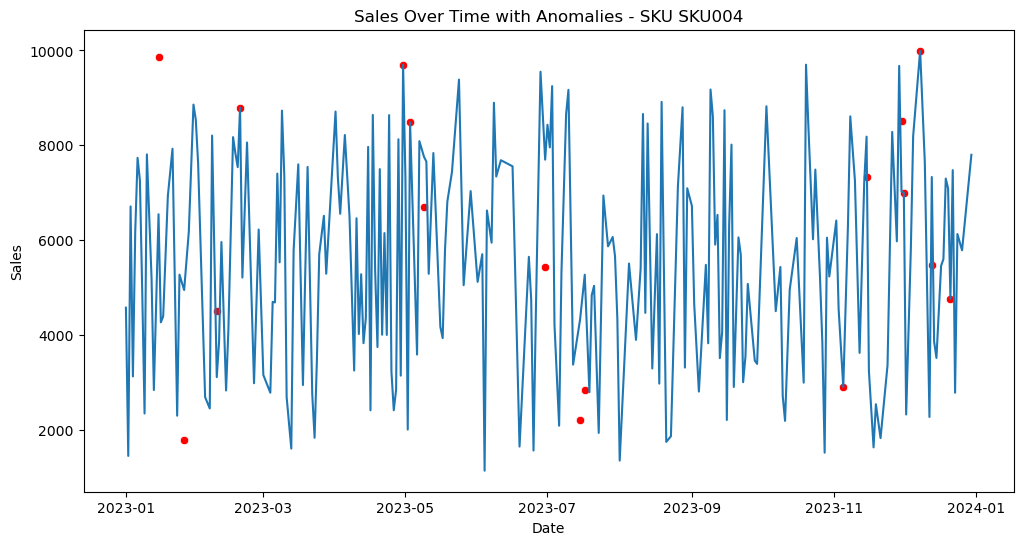

/var/folders/73/vngnlj612kb44dvxhx4fx0fm0000gq/T/ipykernel_31712/3307429856.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Date', y='Sales', data=sales_data_sorted[sales_data_sorted['SKU'] == sku], ci=None)


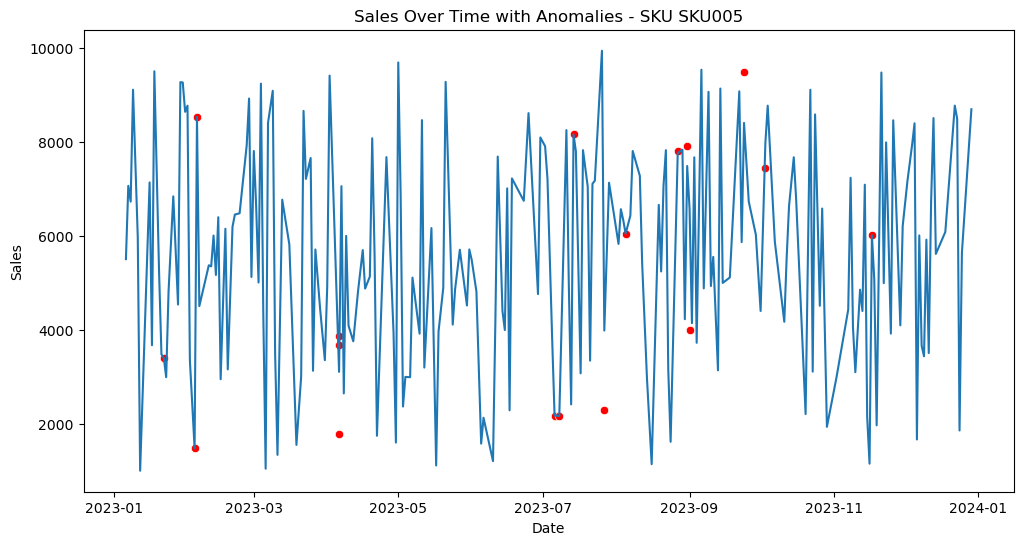

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort the sales_data DataFrame by SKU and Date
sales_data_sorted = sales_data.sort_values(by=['SKU', 'Date']).copy()

# Create sequences of data for the entire DataFrame
sequences_all = [sales_data_sorted[['Sales', 'Price', 'Inventory']].iloc[i:i+seq_length].values for i in range(len(sales_data_sorted) - seq_length + 1)]
X_all = np.array(sequences_all)

# Predict using the LSTM model
predictions_all = model.predict(X_all)
# Calculate reconstruction errors for the entire DataFrame
reconstruction_errors_all = np.mean(np.square(X_all - predictions_all), axis=(1, 2))

# Define a threshold for anomaly detection for the entire DataFrame
threshold_all = np.percentile(reconstruction_errors_all, 95)
anomalies_all = reconstruction_errors_all > threshold_all

# Set anomalies to the 'Anomaly' column
sales_data_sorted['Anomaly'] = False
sales_data_sorted.loc[sales_data_sorted.index[seq_length - 1:], 'Anomaly'] = anomalies_all

# Visualize sales data over time with anomalies, each SKU has its own plot
unique_skus = sales_data_sorted['SKU'].unique()

for sku in unique_skus:
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='Date', y='Sales', data=sales_data_sorted[sales_data_sorted['SKU'] == sku], ci=None)
    sns.scatterplot(x='Date', y='Sales', data=sales_data_sorted[(sales_data_sorted['SKU'] == sku) & sales_data_sorted['Anomaly']], color='red', label='Anomalies', legend=False)
    plt.title(f'Sales Over Time with Anomalies - SKU {sku}')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.show()


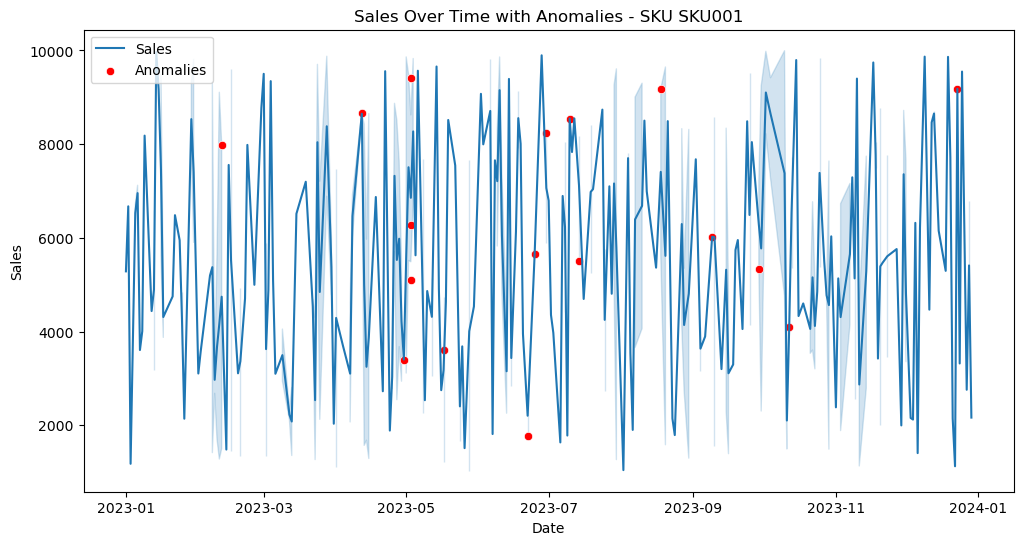

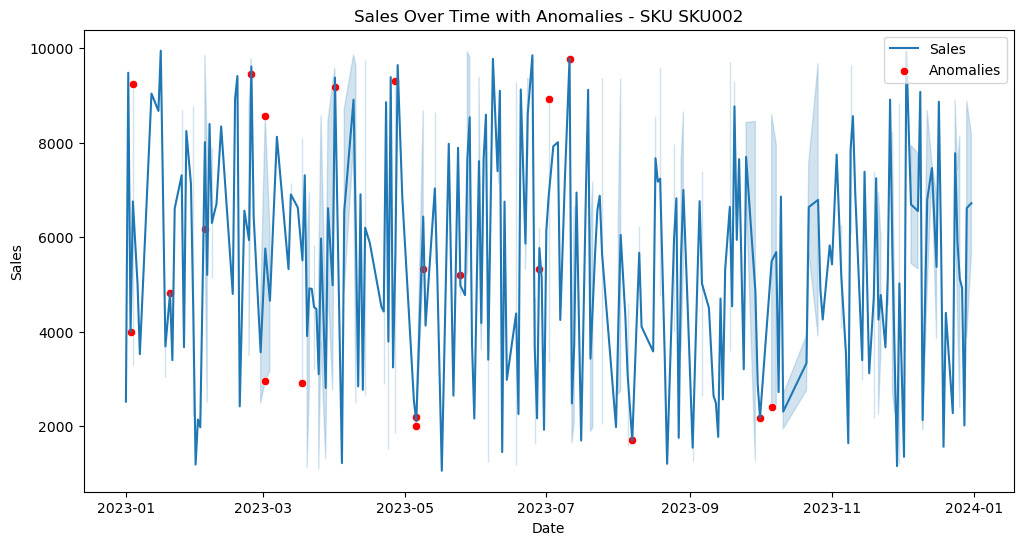

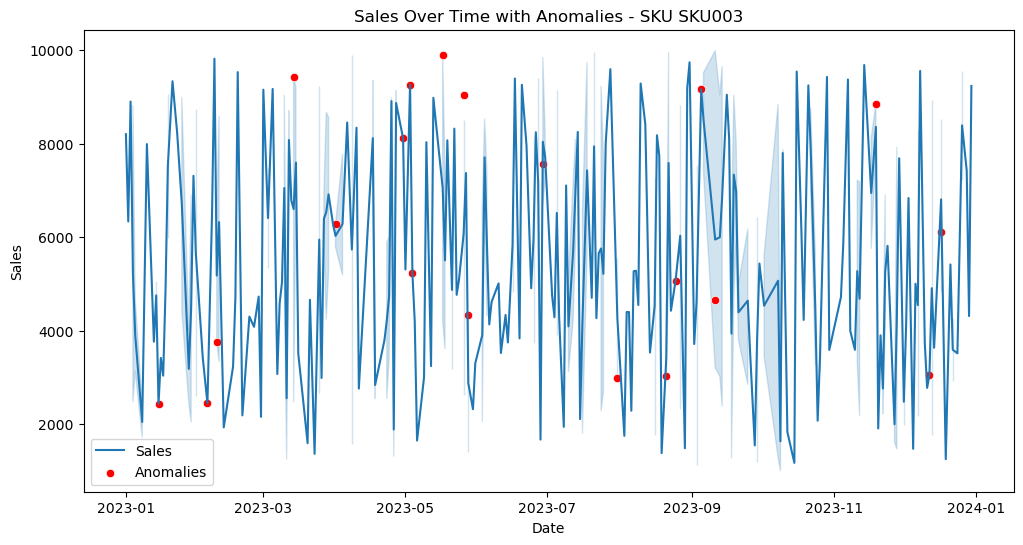

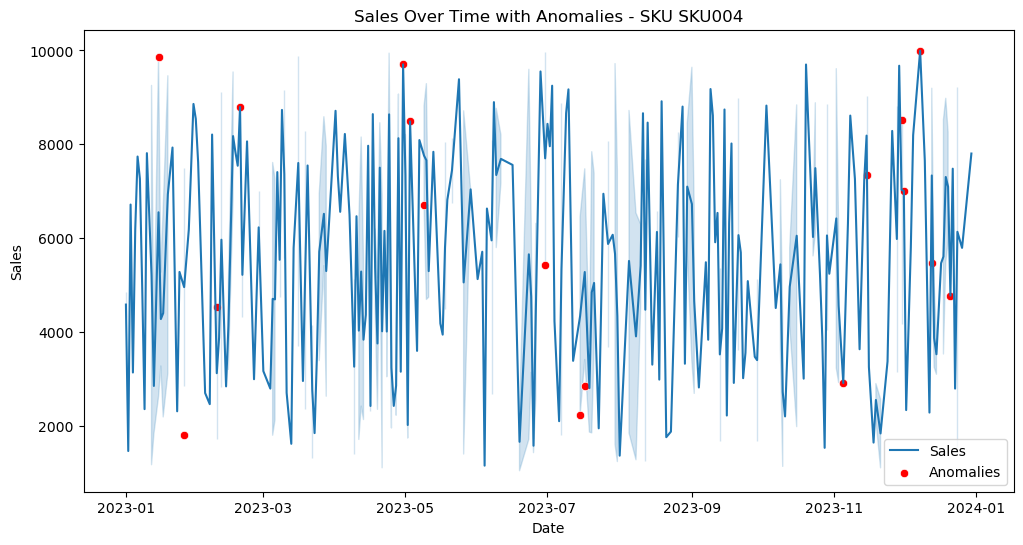

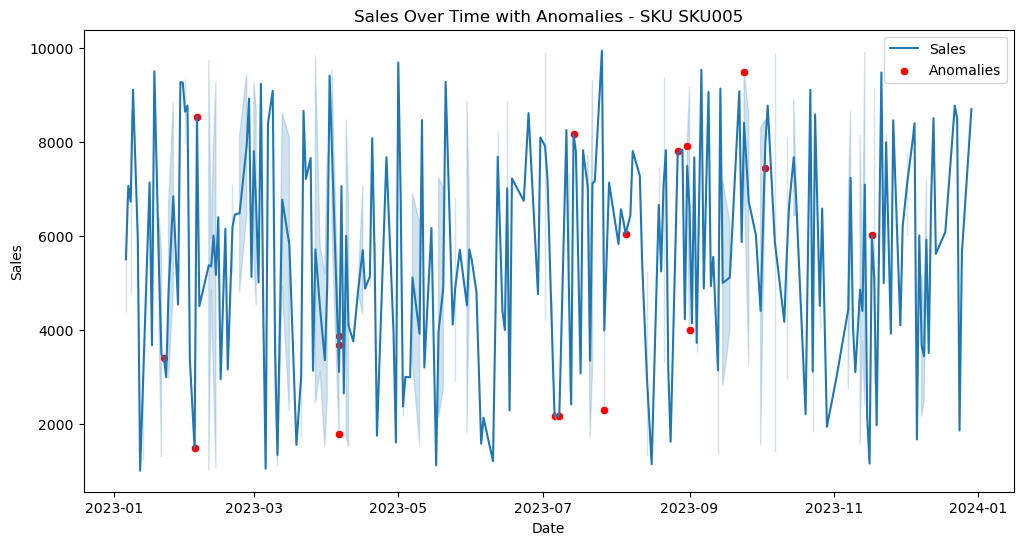

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

for sku in unique_skus:
    plt.figure(figsize=(12, 6))
    
    # Plotting the line plot with a 95% confidence interval
    sns.lineplot(x='Date', y='Sales', data=sales_data_sorted[sales_data_sorted['SKU'] == sku], err_style="band", label='Sales')
    
    # Plotting anomalies in red
    sns.scatterplot(x='Date', y='Sales', data=sales_data_sorted[(sales_data_sorted['SKU'] == sku) & sales_data_sorted['Anomaly']], color='red', label='Anomalies', legend=False)
    
    plt.title(f'Sales Over Time with Anomalies - SKU {sku}')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()  # Show legend including the 'Sales' and 'Anomalies' labels
    plt.show()


57/57 [==============================] - 0s 738us/step


/var/folders/73/vngnlj612kb44dvxhx4fx0fm0000gq/T/ipykernel_31712/3700268624.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Date', y='Sales', data=sales_data_sorted[sales_data_sorted['SKU'] == sku], label='Sales', ci=None)


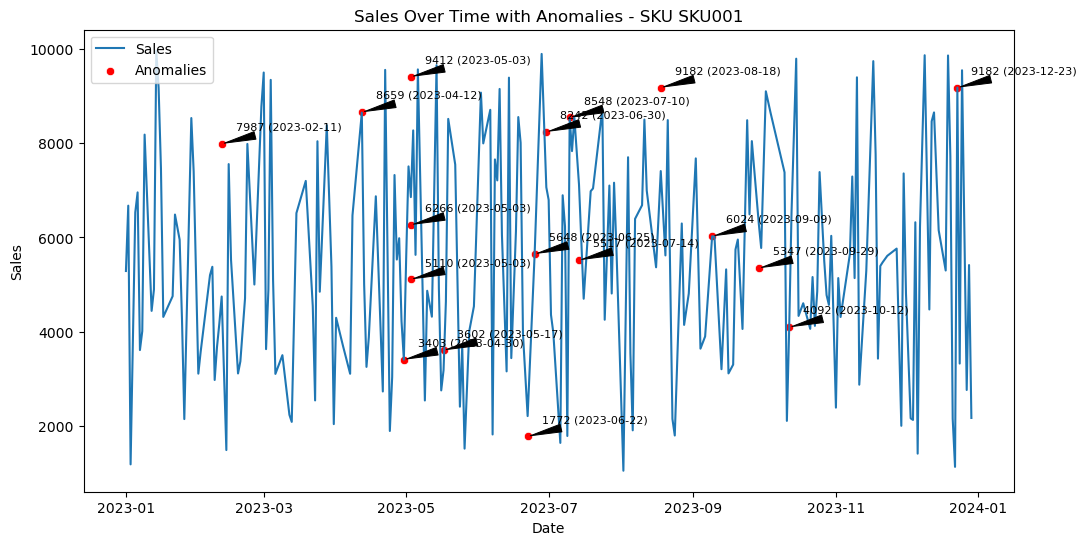

/var/folders/73/vngnlj612kb44dvxhx4fx0fm0000gq/T/ipykernel_31712/3700268624.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Date', y='Sales', data=sales_data_sorted[sales_data_sorted['SKU'] == sku], label='Sales', ci=None)


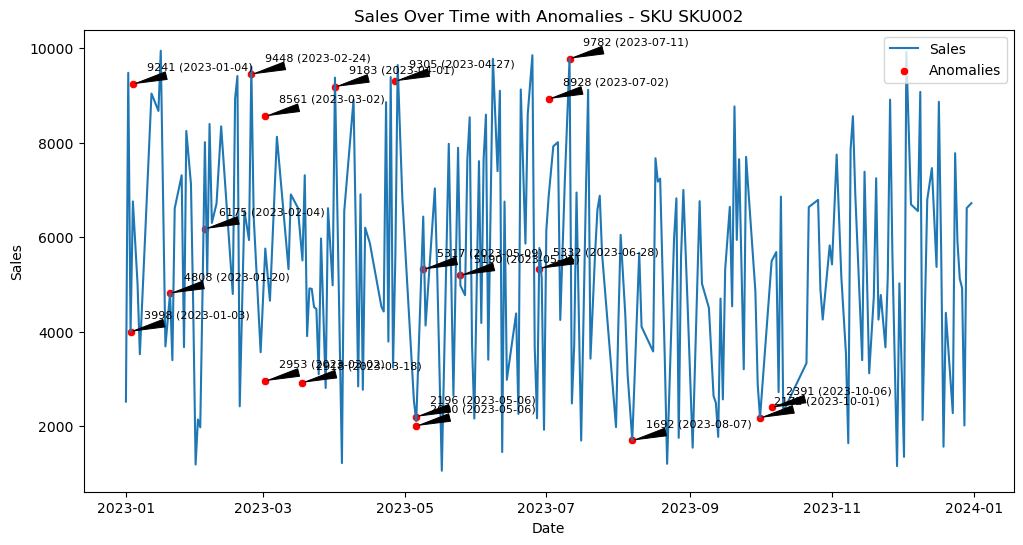

/var/folders/73/vngnlj612kb44dvxhx4fx0fm0000gq/T/ipykernel_31712/3700268624.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Date', y='Sales', data=sales_data_sorted[sales_data_sorted['SKU'] == sku], label='Sales', ci=None)


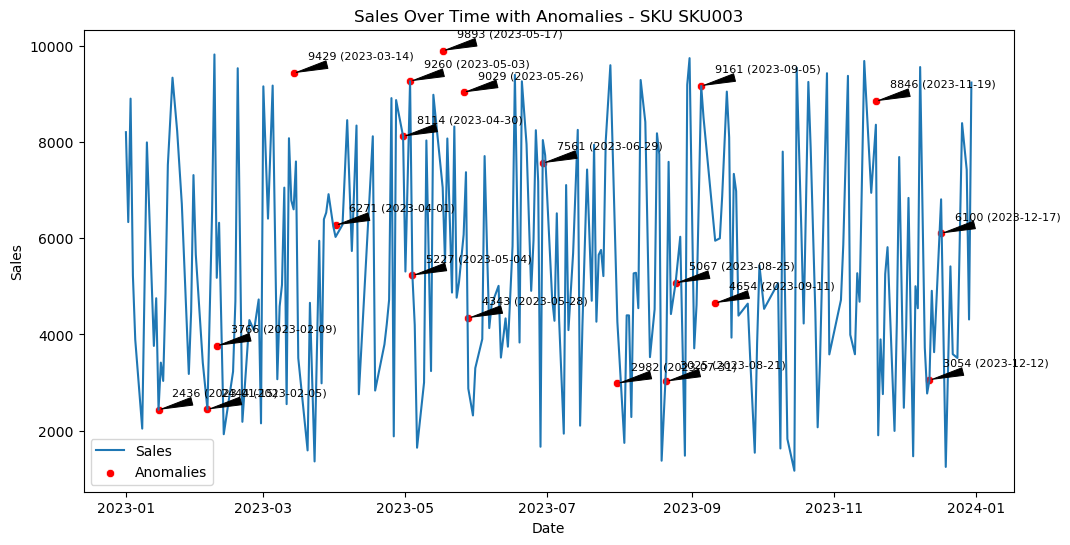

/var/folders/73/vngnlj612kb44dvxhx4fx0fm0000gq/T/ipykernel_31712/3700268624.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Date', y='Sales', data=sales_data_sorted[sales_data_sorted['SKU'] == sku], label='Sales', ci=None)


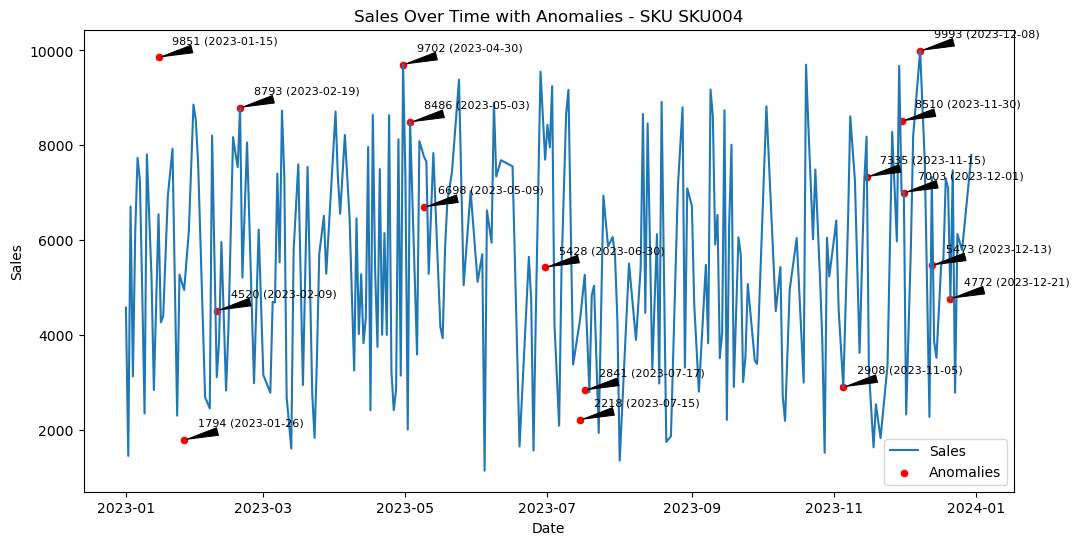

/var/folders/73/vngnlj612kb44dvxhx4fx0fm0000gq/T/ipykernel_31712/3700268624.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Date', y='Sales', data=sales_data_sorted[sales_data_sorted['SKU'] == sku], label='Sales', ci=None)


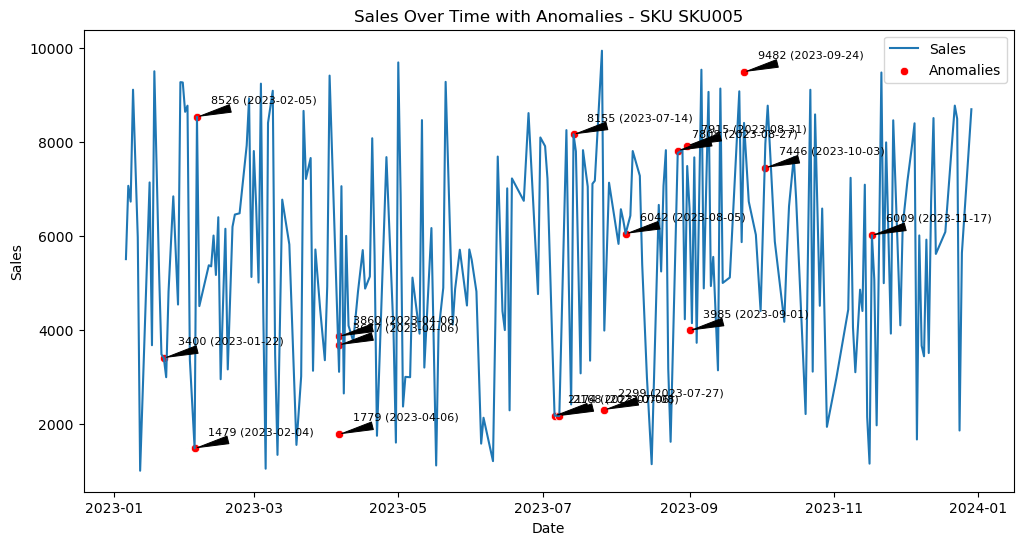

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort the sales_data DataFrame by SKU and Date
sales_data_sorted = sales_data.sort_values(by=['SKU', 'Date']).copy()

# Create sequences of data for the entire DataFrame
sequences_all = [sales_data_sorted[['Sales', 'Price', 'Inventory']].iloc[i:i+seq_length].values for i in range(len(sales_data_sorted) - seq_length + 1)]
X_all = np.array(sequences_all)

# Predict using the LSTM model
predictions_all = model.predict(X_all)
# Calculate reconstruction errors for the entire DataFrame
reconstruction_errors_all = np.mean(np.square(X_all - predictions_all), axis=(1, 2))

# Define a threshold for anomaly detection for the entire DataFrame
threshold_all = np.percentile(reconstruction_errors_all, 95)
anomalies_all = reconstruction_errors_all > threshold_all

# Set anomalies to the 'Anomaly' column
sales_data_sorted['Anomaly'] = False
sales_data_sorted.loc[sales_data_sorted.index[seq_length - 1:], 'Anomaly'] = anomalies_all

# Visualize sales data over time with anomalies, each SKU has its own plot
unique_skus = sales_data_sorted['SKU'].unique()

for sku in unique_skus:
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='Date', y='Sales', data=sales_data_sorted[sales_data_sorted['SKU'] == sku], label='Sales', ci=None)
    sns.scatterplot(x='Date', y='Sales', data=sales_data_sorted[(sales_data_sorted['SKU'] == sku) & sales_data_sorted['Anomaly']], color='red', label='Anomalies')
    
    # Add annotations for amount and date next to red dots
    for idx, row in sales_data_sorted[(sales_data_sorted['SKU'] == sku) & sales_data_sorted['Anomaly']].iterrows():
        plt.annotate(f"{row['Sales']} ({row['Date'].strftime('%Y-%m-%d')})", 
                     xy=(row['Date'], row['Sales']), xycoords='data',
                     xytext=(10, 10), textcoords='offset points',
                     arrowprops=dict(facecolor='black', arrowstyle='wedge,tail_width=0.7', lw=0.7),
                     fontsize=8, color='black')

    plt.title(f'Sales Over Time with Anomalies - SKU {sku}')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.legend()
    plt.show()


In [26]:
sales_data

,Date,SKU,Sales,Price,Inventory,Category
0,2023-12-25,SKU005,5832,-0.727640,-0.971456,Dry Food
1,2023-04-15,SKU001,1293,-1.048724,1.422987,Dry Food
2,2023-03-03,SKU001,4887,-0.366517,0.430076,Collars
3,2023-04-22,SKU002,4417,-0.983275,0.628658,Collars
4,2023-03-31,SKU005,1520,-0.423496,0.743225,Toys
...,...,...,...,...,...,...
1820,2023-11-17,SKU003,5758,-0.526674,0.735587,Collars
1821,2023-08-23,SKU001,2144,1.360559,0.460627,Wet Food
1822,2023-07-24,SKU001,8738,1.033316,1.247318,Collars
1823,2023-12-29,SKU002,7097,-0.006934,-0.207679,Toys


2. Explore SKU-specific anomalies:
   
- analyze which SKUs are more prone to anomalies
- count the occurrences of anomalies for each SKU

In [27]:
sku_anomaly_counts = anomalies_df['SKU'].value_counts()
print("SKU-Specific Anomaly Counts:")
print(sku_anomaly_counts)


SKU-Specific Anomaly Counts:
SKU
SKU002    67
SKU004    60
SKU001    55
SKU005    47
SKU003    44
Name: count, dtype: int64


3. Correlate anomalies with other features:
- check if anomalies are correlated with other features like price or inventory
- compute correlations to identify potential patterns

In [28]:
correlation_matrix = sales_data[['Sales', 'Price', 'Inventory']].corr()
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
              Sales     Price  Inventory
Sales      1.000000  0.006439  -0.006883
Price      0.006439  1.000000  -0.025578
Inventory -0.006883 -0.025578   1.000000


4. Forecast future anomalies
- extend the analysis to forecast anomalies in the future
- use the trained LSTM model to predict sales and detect anomalies in upcoming time points

In [29]:
# Generate future sequences for prediction
future_sequences = [sales_data[['Sales', 'Price', 'Inventory']].iloc[-seq_length:].values]
for _ in range(10):
    # Predict the next step and append it to the sequence
    future_X = np.array([future_sequences[-1]])
    future_prediction = model.predict(future_X)
    future_sequences.append(future_prediction[0])

# Convert the list of sequences to a numpy array
future_X = np.array(future_sequences)

# Calculate reconstruction errors for future predictions
future_reconstruction_errors = np.mean(np.square(future_X - future_prediction), axis=(1, 2))

# Detect future anomalies
future_anomalies = future_reconstruction_errors > threshold
print("Future Anomalies:")
print(future_anomalies)


1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 11ms/step
Future Anomalies:
[ True  True  True  True  True  True  True  True False False False]


### Further analysis

#### Anomaly Exploration

In [30]:
anomalies_lstm_combined = np.any(anomalies_lstm, axis=1)
anomalies_lstm_combined

array([False, False, False, ..., False, False,  True])

In [31]:
anomalies_lstm

array([[False, False, False],
       [False, False, False],
       [False, False, False],
       ...,
       [False, False, False],
       [False, False, False],
       [ True, False, False]])

In [32]:
anomalies_lstm.shape

(1819, 3)

In [33]:
sales_data.shape

(1825, 6)

In [34]:
anomalies_lstm[:, 0]

array([False, False, False, ..., False, False,  True])

In [36]:
# # Anomaly Exploration
# anomalies_by_month = sales_data.loc[anomalies_lstm[:, 0], 'Date'].dt.month.value_counts()
# print(anomalies_by_month)


In [ ]:
# Check the dimensions of your arrays
print("sales_data shape:", sales_data.shape)
print("anomalies_lstm shape:", anomalies_lstm.shape)

# Ensure the number of rows match
if sales_data.shape[0] == anomalies_lstm.shape[0]:
    # Anomaly Exploration
    anomalies_by_month = sales_data.loc[anomalies_lstm[:, 0], 'Date'].dt.month.value_counts()
    print(anomalies_by_month)
else:
    print("Number of rows in sales_data and anomalies_lstm do not match.")


sales_data shape: (1825, 6)
anomalies_lstm shape: (1819, 3)
Number of rows in sales_data and anomalies_lstm do not match.


#### Feature Importance

In [ ]:
# Feature Importance
feature_importance = model.layers[0].get_weights()[0]
print("Feature Importance:")
print(feature_importance)


Feature Importance:
[[-1.30283967e-01 -1.40889183e-01  8.72408897e-02 -2.70580221e-02
   5.10150343e-02 -1.32405058e-01 -1.61524460e-01 -1.60779327e-01
  -2.22674962e-02  4.64688726e-02 -9.80103612e-02 -2.24421024e-02
   1.43642649e-01 -1.30880684e-01  2.21468695e-02  1.27683684e-01
   7.54099637e-02  2.73244306e-02 -4.34237858e-03  3.20190266e-02
   1.76101103e-01 -7.23535717e-02  1.63575381e-01 -6.63508847e-02
   9.25282538e-02  2.28086989e-02 -1.89657703e-01  1.56773075e-01
  -1.51974708e-02  2.96945125e-02 -1.40995398e-01 -4.91133481e-02
   1.87126443e-01 -1.55474037e-01  1.56309396e-01  1.28768682e-01
  -1.25358045e-01  8.66086408e-02 -3.79779935e-03 -1.36369184e-01
  -5.29937819e-02 -1.56205684e-01  3.95400589e-03  1.08573556e-01
   6.71746433e-02  1.58531547e-01 -1.01439595e-01  6.42310977e-02
   7.49682263e-02  1.36524484e-01 -1.68316677e-01 -1.15408726e-01
  -2.73846872e-02  1.30586520e-01  5.57972640e-02 -8.19088817e-02
   1.06567115e-01 -1.78755969e-01 -6.54677525e-02  6.078

In [ ]:
feature_importance.shape

(3, 200)

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# import numpy as np

# # Transpose the feature_importance array for better visualization
# feature_importance_transposed = np.transpose(feature_importance)

# # Create a DataFrame
# feature_importance_df = pd.DataFrame(feature_importance_transposed, columns=feature_names)

# # Create a heatmap
# plt.figure(figsize=(10, 6))
# sns.heatmap(feature_importance_df, cmap='viridis', annot=True, fmt='.2f', yticklabels=False)
# plt.title('Feature Importance Heatmap')
# plt.xlabel('Importance')
# plt.ylabel('Features')
# plt.show()


In [ ]:
# len(feature_names)

3

In [ ]:
feature_importance.size

600

#### Correlation analysis

In [37]:
# # Correlation Analysis
# correlation_matrix = sales_data[['Sales', 'Price', 'Inventory', 'Anomaly']].corr()
# print("Correlation Matrix:")
# print(correlation_matrix)


#### Performance metrics

In [ ]:
# # Performance Metrics
# precision = precision_score(sales_data['Anomaly'], anomalies_lstm)
# recall = recall_score(sales_data['Anomaly'], anomalies_lstm)
# f1 = f1_score(sales_data['Anomaly'], anomalies_lstm)
# print("Precision:", precision)
# print("Recall:", recall)
# print("F1 Score:", f1)


#### Optimization and hyperparateter tuning for LSTM

In [ ]:
# Example: Hyperparameter Tuning
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length, 3), return_sequences=True))
model.add(Dense(3))
model.compile(optimizer='adam', loss='mse')

# Train the model with adjusted hyperparameters
model.fit(X, X, epochs=100, batch_size=32, verbose=0)


#### Forecasting future sales

In [ ]:
# Forecasting Future Sales
future_predictions = model.predict(future_X)
print("Future Sales Predictions:")
print(future_predictions)


#### Threshold sensitivity analysis

In [ ]:
# # Threshold Sensitivity Analysis
# threshold_values = np.linspace(0, 1, 100)
# precision_values = []
# recall_values = []

# for threshold in threshold_values:
#     anomalies = reconstruction_errors > threshold
#     precision_values.append(precision_score(sales_data['Anomaly'], anomalies))
#     recall_values.append(recall_score(sales_data['Anomaly'], anomalies))

# # Plot precision and recall against threshold values
# plt.plot(threshold_values, precision_values, label='Precision')
# plt.plot(threshold_values, recall_values, label='Recall')
# plt.xlabel('Threshold')
# plt.ylabel('Score')
# plt.legend()
# plt.show()


#### Ensemble methods

In [ ]:
# Ensemble Methods (Example: Isolation Forest)
from sklearn.ensemble import IsolationForest

# Train Isolation Forest
iso_forest = IsolationForest(contamination=0.05)
iso_forest.fit(sales_data[['Sales', 'Price', 'Inventory']])

# Predict anomalies with Isolation Forest
anomalies_iso_forest = iso_forest.predict(sales_data[['Sales', 'Price', 'Inventory']])


In [ ]:
import numpy as np

# Predict anomalies with Isolation Forest
anomalies_iso_forest = iso_forest.predict(sales_data[['Sales', 'Price', 'Inventory']])

# Ensure both arrays have the same shape
anomalies_iso_forest_expanded = np.repeat(anomalies_iso_forest[:, np.newaxis], 3, axis=1)

# Ensure both arrays have the same length
min_length = min(len(anomalies_iso_forest), len(anomalies_lstm))


# Combine LSTM and Isolation Forest predictions
combined_anomalies = anomalies_lstm[:min_length] & (anomalies_iso_forest_expanded[:min_length] == -1)
print("Combined Anomalies:")
print(combined_anomalies)


Combined Anomalies:
[[False False False]
 [False False False]
 [False False False]
 ...
 [False False False]
 [False False False]
 [False False False]]


#### Ensemble methods

**Note to myself:**

LSTM will have a `seq_length`. I need to make sure the dates are aligned from two models.

In [ ]:
# Import necessary libraries
from sklearn.metrics import precision_score, recall_score, f1_score
import statsmodels.api as sm

# Anomaly Exploration
anomalies_by_month = sales_data[sales_data['Anomaly']].groupby(sales_data['Date'].dt.month)['Anomaly'].count()

# Feature Importance
feature_importance = model.layers[0].get_weights()[0]

# Correlation Analysis
correlation_matrix = sales_data[['Sales', 'Price', 'Inventory', 'Anomaly']].corr()

# Performance Metrics
precision = precision_score(sales_data['Anomaly'], anomalies_lstm)
recall = recall_score(sales_data['Anomaly'], anomalies_lstm)
f1 = f1_score(sales_data['Anomaly'], anomalies_lstm)

# Forecasting Future Sales
future_predictions = model.predict(future_X)

# Threshold Sensitivity Analysis
threshold_values = np.linspace(0, 1, 100)
precision_values = []
recall_values = []

for threshold in threshold_values:
    anomalies = reconstruction_errors > threshold
    precision_values.append(precision_score(sales_data['Anomaly'], anomalies))
    recall_values.append(recall_score(sales_data['Anomaly'], anomalies))

# Ensemble Methods (Example: Isolation Forest)
from sklearn.ensemble import IsolationForest

# Train Isolation Forest
iso_forest = IsolationForest(contamination=0.05)
iso_forest.fit(sales_data[['Sales', 'Price', 'Inventory']])

# Predict anomalies with Isolation Forest
anomalies_iso_forest = iso_forest.predict(sales_data[['Sales', 'Price', 'Inventory']])

# Combine LSTM and Isolation Forest predictions
combined_anomalies = anomalies_lstm & (anomalies_iso_forest == -1)


KeyError: 'Anomaly'